#📈 Egy Stock Market Prediction
This notebook predicts weekly stock performance (Perf.W) using financial and technical indicators. It applies both regression (to estimate Perf.W) and classification (to predict if a stock will go up or down)

# 🔹 Part 1: Import and Load Data

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [81]:
df = pd.read_csv('/content/df_assets (3).csv')

# 🔹 Part 2: Explore and Clean Data

In [3]:
print("Shape:", df.shape)
print(df.isnull().sum().sort_values(ascending=False))


Shape: (251, 49)
price_earnings_growth_ttm                    214
price_free_cash_flow_ttm                     206
sell_gen_admin_exp_other_ratio_ttm           198
price_earnings_ttm                           186
gross_margin_ttm                             184
free_cash_flow_margin_ttm                    177
price_sales_current                          175
return_on_equity_fq                          174
return_on_assets_fq                          174
cash_f_operating_activities_ttm              172
cash_f_investing_activities_ttm              172
cash_f_financing_activities_ttm              172
operating_margin_ttm                         172
total_revenue_ttm                            170
cash_n_short_term_invest_to_total_debt_fq    139
quick_ratio_fq                               135
current_ratio_fq                             120
price_to_cash_ratio                          101
price_book_fq                                 93
debt_to_equity_fq                             92
tot

In [4]:
# Drop the columns that has more than 80 missing value
columns_to_drop = [
    'price_earnings_growth_ttm',
    'price_free_cash_flow_ttm',
    'sell_gen_admin_exp_other_ratio_ttm',
    'price_earnings_ttm',
    'gross_margin_ttm',
    'free_cash_flow_margin_ttm',
    'price_sales_current',
    'return_on_equity_fq',
    'return_on_assets_fq',
    'cash_f_operating_activities_ttm',
    'cash_f_investing_activities_ttm',
    'cash_f_financing_activities_ttm',
    'operating_margin_ttm',
    'total_revenue_ttm',
    'cash_n_short_term_invest_to_total_debt_fq',
    'quick_ratio_fq',
    'current_ratio_fq',
    'price_to_cash_ratio',
    'price_book_fq',
    'debt_to_equity_fq',
    'total_debt_fq',
    'net_debt_fq',
    'total_equity_fq',
    'total_assets_fq'
]

df_cleaned = df.drop(columns=columns_to_drop)
df_cleaned.shape[1]

25

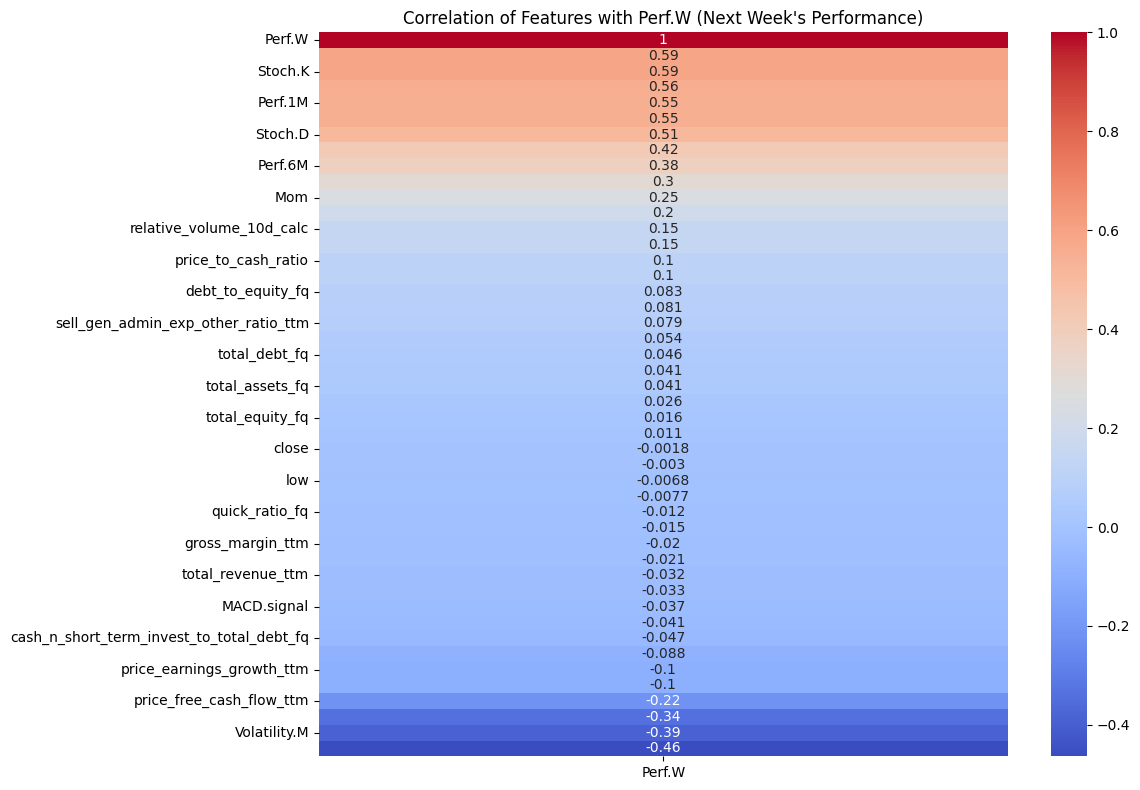

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
correlations = df.corr(numeric_only=True)['Perf.W'].sort_values(ascending=False)

# Display correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True)[['Perf.W']].sort_values(by='Perf.W', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation of Features with Perf.W (Next Week's Performance)")
plt.tight_layout()
plt.show()


In [5]:
cols_to_fill = ['CCI20', 'MACD.signal', 'Stoch.D', 'MACD.macd', 'AO', 'relative_volume_10d_calc', 'Stoch.K', 'RSI', 'Mom']
df_cleaned[cols_to_fill] = df_cleaned[cols_to_fill].fillna(df_cleaned[cols_to_fill].mean())


# 🔹 Part 3: Feature & Target Selection

In [6]:
X = df_cleaned.drop(columns=['Perf.W', 'ticker', 'description', 'sector'])
y = df_cleaned['Perf.W']


In [7]:
split_index = int(len(df_cleaned) * 0.8)
X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:]
y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]


In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# 🔹 Part 4: 🔢 Random Forest Regression

In [9]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Evaluation:")
print("Mean Squared Error:", mse)
print("R² Score:", r2)


Random Forest Evaluation:
Mean Squared Error: 32.586414091939474
R² Score: -0.39588128815355184


In [43]:
#✅ Optional: Predict on the Entire Dataset
tickers_all = df_cleaned['ticker']

predictions_with_tickers = pd.DataFrame({
    'Ticker': tickers_all,
    'Predicted_Perf.W': y_pred_all
})
print(predictions_with_tickers)

               Ticker  Predicted_Perf.W
0            EGX:EGTS        -11.811624
1            EGX:JUFO         -1.470988
2            EGX:TMGH         -0.150640
3            EGX:COMI          1.637972
4            EGX:CRST         24.746899
..                ...               ...
246          EGX:PHTV          0.179451
247          EGX:GGRN         -2.184779
248          EGX:FERC         -0.710666
249  EGX:EGS370O1C013         -0.790685
250          EGX:MKIT         12.838118

[251 rows x 2 columns]


# Part 5: 🔢 SVM Regression Model

In [13]:
svm_model = SVR()
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print("SVM Evaluation:")
print("Mean Squared Error:", mse_svm)
print("R² Score:", r2_svm)



SVM Evaluation:
Mean Squared Error: 20.131600654582403
R² Score: 0.1376367901351112


# Part 6: 📊 Combine Predictions with Actuals & Prices

In [16]:
result_df = pd.DataFrame({
    'Ticker': df_cleaned['ticker'],
    'Actual_Perf.W': df_cleaned['Perf.W'],
    'Predicted_Perf.W_RF': y_pred_all,
    'Close_Price': df_cleaned['close']
})


In [19]:
y_pred_all_svm = svm_model.predict(X_all)
result_df['Predicted_Perf.W_SVM'] = y_pred_all_svm


In [44]:
print(result_df)


               Ticker  Actual_Perf.W  Predicted_Perf.W_RF  Close_Price  \
0            EGX:EGTS     -13.991770           -11.811624        8.360   
1            EGX:JUFO       0.636943            -1.470988       28.440   
2            EGX:TMGH      -0.953271            -0.150640       52.990   
3            EGX:COMI       1.500000             1.637972       81.200   
4            EGX:CRST      29.861982            24.746899        1.035   
..                ...            ...                  ...          ...   
246          EGX:PHTV      -2.044936             0.179451      111.610   
247          EGX:GGRN      -1.574803            -2.184779        1.250   
248          EGX:FERC       0.000000            -0.710666        9.220   
249  EGX:EGS370O1C013       0.000000            -0.790685        1.000   
250          EGX:MKIT       9.927361            12.838118        4.540   

     Predicted_Perf.W_SVM  
0               -1.405315  
1                0.025612  
2                1.835344  

#  Part 7: 🧭 Classification – Will the Stock Go Up?

In [69]:
# Create classification target
df['Direction'] = (df['Perf.W'] > 0).astype(int)

# Select numeric features only
features = [
    'change', 'Perf.1M', 'Stoch.K', 'RSI', 'CCI20',
    'Stoch.D', 'Perf.3M', 'Perf.6M', 'Perf.YTD', 'Mom'
]

X = df[features].dropna()
y = df.loc[X.index, 'Direction']

In [53]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_class)

In [73]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

In [91]:
from xgboost import XGBClassifier
clf = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

In [98]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
all_preds = np.zeros(len(X_class))
accuracies = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X_scaled, y_class), 1):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y_class.iloc[train_idx], y_class.iloc[test_idx]

    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    all_preds[test_idx] = preds

    acc = accuracy_score(y_test, preds)
    accuracies.append(acc)

    print(f"\n📂 Fold {fold}")
    print("🎯 Accuracy:", round(acc, 4))
    print("📋 Classification Report:\n", classification_report(y_test, preds))

# Step 6: Save predictions
df_class = df.loc[X_class.index].copy()
df_class['Predicted_Up'] = all_preds.astype(int)

# Step 7: Print final results
print(f"\n✅ Average CV Accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")


📂 Fold 1
🎯 Accuracy: 0.8431
📋 Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89        33
           1       0.86      0.67      0.75        18

    accuracy                           0.84        51
   macro avg       0.85      0.80      0.82        51
weighted avg       0.84      0.84      0.84        51


📂 Fold 2
🎯 Accuracy: 0.86
📋 Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90        33
           1       0.86      0.71      0.77        17

    accuracy                           0.86        50
   macro avg       0.86      0.82      0.84        50
weighted avg       0.86      0.86      0.86        50


📂 Fold 3
🎯 Accuracy: 0.76
📋 Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.91      0.83        33
           1       0.73      0.47      0.57        17

    accuracy         

In [156]:
classification_df = df_cleaned[['ticker', 'Perf.W', 'Target_Up', 'Predicted_Up', 'close']]
print(classification_df)


               ticker     Perf.W  Target_Up  Predicted_Up    close
0            EGX:EGTS -13.991770          0             0    8.360
1            EGX:JUFO   0.636943          1             0   28.440
2            EGX:TMGH  -0.953271          0             1   52.990
3            EGX:COMI   1.500000          1             1   81.200
4            EGX:CRST  29.861982          1             1    1.035
..                ...        ...        ...           ...      ...
246          EGX:PHTV  -2.044936          0             0  111.610
247          EGX:GGRN  -1.574803          0             0    1.250
248          EGX:FERC   0.000000          0             0    9.220
249  EGX:EGS370O1C013   0.000000          0             0    1.000
250          EGX:MKIT   9.927361          1             1    4.540

[251 rows x 5 columns]


# 🔹 Part 8:  Risk Segmentation with Confidence Scores

In [100]:
df['Volatility.W'] = (
    df['Volatility.W']
    .astype(str)
    .str.replace('%', '', regex=False)
    .str.strip()
)
df['Volatility.W'] = pd.to_numeric(df['Volatility.W'], errors='coerce')


In [101]:
volatility = df.loc[X_class.index, 'Volatility.W'].reset_index(drop=True)
sector = df.loc[X_class.index, 'sector'].reset_index(drop=True)
ticker = df.loc[X_class.index, 'ticker'].reset_index(drop=True)


In [102]:
probas = clf.predict_proba(X_scaled)[:, 1]

In [103]:
low_cutoff = volatility.quantile(0.33)
high_cutoff = volatility.quantile(0.66)

def label_risk(vol):
    if vol <= low_cutoff:
        return 'Low'
    elif vol <= high_cutoff:
        return 'Medium'
    else:
        return 'High'

risk_level = volatility.apply(label_risk)

In [65]:
# Risk segmentation
vol_test = test_df['volatility']
low, high = vol_test.quantile([0.33, 0.66])

def label_risk(vol):
  if vol <= low:
      return 'Low'
  elif vol <= high:
      return 'Medium'
  return 'High'

risk_labels = vol_test.apply(label_risk)


In [104]:
risk_results = pd.DataFrame({
    'Ticker': ticker,
    'Sector': sector,
    'Predicted Direction': np.where(df_class['Predicted_Up'] == 1, 'Up', 'Down'),
    'Confidence (%)': (probas * 100).round(1),
    'Volatility (%)': volatility.round(2),
    'Risk Level': risk_level
}).sort_values(by='Confidence (%)', ascending=False).reset_index(drop=True)

# Step 6: Show preview
print("📊 Risk-Tagged Prediction Preview:")
print(risk_results)

📊 Risk-Tagged Prediction Preview:
       Ticker                  Sector Predicted Direction  Confidence (%)  \
0     EGX:OIH          Communications                  Up            98.8   
1    EGX:AIFI      Process Industries                  Up            98.0   
2    EGX:BINV                 Finance                  Up            96.7   
3    EGX:UEGC     Industrial Services                  Up            96.7   
4    EGX:POUL      Process Industries                  Up            96.3   
..        ...                     ...                 ...             ...   
246  EGX:CCAP                 Finance                Down             1.8   
247  EGX:SCEM     Non-Energy Minerals                Down             1.6   
248  EGX:EGCH      Process Industries                Down             1.5   
249  EGX:ELEC  Producer Manufacturing                Down             1.4   
250  EGX:RACC     Commercial Services                Down             0.5   

     Volatility (%) Risk Level  
0       

# Part 9: 📥 Predicting on New Week’s Dataset

In [105]:
df_new = pd.read_csv('/content/23-5-2025.csv')

In [113]:
df_new_sorted = df_new.sort_values(by='ticker').reset_index(drop=True)
results_df_sorted = df_class.sort_values(by='ticker').reset_index(drop=True)

In [114]:
# Step 3: Filter new dataset to only include previously predicted tickers
tickers_old = results_df_sorted['ticker'].unique()
df_new_filtered = df_new[df_new['ticker'].isin(tickers_old)].copy()
df_new_filtered = df_new_filtered.sort_values(by='ticker').reset_index(drop=True)


In [126]:
print(results_df_sorted.columns.tolist())


['ticker', 'description', 'sector', 'open', 'high', 'low', 'close', 'change', 'Perf.W', 'Perf.1M', 'Perf.3M', 'Perf.6M', 'Perf.YTD', 'RSI', 'Mom', 'AO', 'CCI20', 'Stoch.K', 'Stoch.D', 'MACD.macd', 'MACD.signal', 'volume', 'relative_volume_10d_calc', 'Volatility.W', 'Volatility.M', 'price_earnings_ttm', 'price_earnings_growth_ttm', 'price_sales_current', 'price_book_fq', 'price_free_cash_flow_ttm', 'price_to_cash_ratio', 'gross_margin_ttm', 'operating_margin_ttm', 'return_on_assets_fq', 'return_on_equity_fq', 'free_cash_flow_margin_ttm', 'sell_gen_admin_exp_other_ratio_ttm', 'cash_f_operating_activities_ttm', 'cash_f_investing_activities_ttm', 'cash_f_financing_activities_ttm', 'total_debt_fq', 'net_debt_fq', 'debt_to_equity_fq', 'cash_n_short_term_invest_to_total_debt_fq', 'total_revenue_ttm', 'total_assets_fq', 'total_equity_fq', 'current_ratio_fq', 'quick_ratio_fq', 'Predicted_Up']


In [127]:
# Step 4: Merge on ticker and compare close prices
merged_df = pd.merge(
    results_df_sorted,
    df_new_filtered[['ticker', 'close']],
    on='ticker',
    how='inner',
    suffixes=('', '_new')  # now we have 'close' and 'close_new'
)

# Step 5: Actual direction based on new price
merged_df['real_up'] = (merged_df['close_new'] > merged_df['close']).astype(int)

# Step 6: Compare predictions
merged_df['prediction_correct'] = (merged_df['Predicted_Up'] == merged_df['real_up']).astype(int)


In [131]:
# Step 7: Summary stats
correct_count = merged_df['prediction_correct'].sum()
incorrect_count = len(merged_df) - correct_count

print(f"✅ Correct Predictions: {correct_count}")
print(f"❌ Incorrect Predictions: {incorrect_count}")


✅ Correct Predictions: 158
❌ Incorrect Predictions: 93


In [132]:
# Step 8: Analyze incorrect predictions
wrong_predictions_df = merged_df[merged_df['prediction_correct'] == 0].copy()
wrong_predictions_df['close_diff'] = (wrong_predictions_df['close_new'] - wrong_predictions_df['close']).abs()


In [139]:
print(wrong_detailed.columns.tolist())


['ticker', 'description_x', 'sector_x', 'open', 'high', 'low', 'close', 'change', 'Perf.W', 'Perf.1M', 'Perf.3M', 'Perf.6M', 'Perf.YTD', 'RSI', 'Mom', 'AO', 'CCI20', 'Stoch.K', 'Stoch.D', 'MACD.macd', 'MACD.signal', 'volume', 'relative_volume_10d_calc', 'Volatility.W', 'Volatility.M', 'price_earnings_ttm', 'price_earnings_growth_ttm', 'price_sales_current', 'price_book_fq', 'price_free_cash_flow_ttm', 'price_to_cash_ratio', 'gross_margin_ttm', 'operating_margin_ttm', 'return_on_assets_fq', 'return_on_equity_fq', 'free_cash_flow_margin_ttm', 'sell_gen_admin_exp_other_ratio_ttm', 'cash_f_operating_activities_ttm', 'cash_f_investing_activities_ttm', 'cash_f_financing_activities_ttm', 'total_debt_fq', 'net_debt_fq', 'debt_to_equity_fq', 'cash_n_short_term_invest_to_total_debt_fq', 'total_revenue_ttm', 'total_assets_fq', 'total_equity_fq', 'current_ratio_fq', 'quick_ratio_fq', 'Predicted_Up', 'close_new', 'real_up', 'prediction_correct', 'close_diff', 'description_y', 'sector_y']


In [140]:
# Step 9: Clean and merge with company info
df_cleaned['ticker'] = df_cleaned['ticker'].astype(str).str.strip().str.upper()
wrong_predictions_df['ticker'] = wrong_predictions_df['ticker'].astype(str).str.strip().str.upper()

# Safe merge (avoid overwriting if description/sector already exist)
wrong_detailed = wrong_predictions_df.merge(
    df_cleaned[['ticker', 'description', 'sector']],
    on='ticker',
    how='left',
    suffixes=('', '_info')  # prevent overwrite
)

# Fill missing values after checking actual column names
wrong_detailed[['description_info', 'sector_info']] = wrong_detailed[['description_info', 'sector_info']].fillna('Unknown')


In [149]:
# Step 10: Display wrong predictions
from IPython.display import display
print(f"❌ Total Incorrect Predictions: {len(wrong_detailed)}")
display(wrong_detailed[['ticker', 'description_info', 'sector_info', 'close', 'close_new', 'close_diff']])


❌ Total Incorrect Predictions: 93


,ticker,description_info,sector_info,close,close_new,close_diff
0,EGX:ADIB,ABU DHABI ISLAMIC BANK- EGYPT,Finance,40.700,41.700,1.00
1,EGX:ADPC,THE ARAB DAIRY PRODUCTS CO. ARAB DAIRY - PANDA,Consumer Non-Durables,3.550,3.650,0.10
2,EGX:ADRI,ARAB DEVELOPMENT & REAL ESTATE INVESTMENT,Finance,1.080,1.100,0.02
3,EGX:AIFI,ATLAS FOR INVESTMENT AND FOOD INDUSTRIES,Process Industries,1.840,1.800,0.04
4,EGX:AIH,ARABIA INVESTMENTS HOLDING,Industrial Services,0.538,0.528,0.01
...,...,...,...,...,...,...
88,EGX:TANM,TANMIYA FOR REAL ESTATE INVESTMENT,Finance,3.440,3.490,0.05
89,EGX:TMGH,T M G HOLDING,Finance,52.990,51.010,1.98
90,EGX:UEGC,ELSAEED CONTRACTING& REAL ESTATE INVESTMENT CO...,Industrial Services,1.120,1.100,0.02
91,EGX:UPMS,UNION PHARMACIST COMPANY FOR MEDICAL SERVICES ...,Health Services,8.970,7.900,1.07


In [148]:
# Step 11: Sector-level error breakdown
sector_error_counts = wrong_detailed['sector_info'].value_counts()
print("❌ Incorrect Predictions by Sector:")
print(sector_error_counts)


❌ Incorrect Predictions by Sector:
sector_info
Finance                   28
Process Industries        17
Industrial Services        6
Non-Energy Minerals        5
Consumer Non-Durables      4
Health Technology          4
Distribution Services      4
Health Services            3
Consumer Services          3
Commercial Services        3
Technology Services        3
Consumer Durables          2
Unknown                    2
Transportation             2
Utilities                  2
Producer Manufacturing     2
Retail Trade               1
Communications             1
Electronic Technology      1
Name: count, dtype: int64


In [147]:
# Step 12: Top 10 worst misses
worst_wrong_predictions = wrong_detailed.sort_values(by='close_diff', ascending=False).head(10)

display(worst_wrong_predictions[['ticker', 'description_info', 'sector_info', 'close', 'close_new', 'close_diff']])


,ticker,description_info,sector_info,close,close_new,close_diff
82,EGX:SCTS,SUES CANAL COMPANY FOR TECHNOLOGY SETTLING,Commercial Services,118.00,137.00,19.00
55,EGX:MBSC,MISR BENI SUEF CEMENT,Non-Energy Minerals,85.75,91.48,5.73
78,EGX:ROTO,ROWAD TOURISM (AL ROWAD),Finance,28.01,32.28,4.27
46,EGX:IDRE,ISMAILIA DEVELOPMENT AND REAL ESTATE CO,Finance,26.87,29.99,3.12
45,EGX:HRHO,EFG HOLDING,Finance,28.75,31.75,3.00
81,EGX:SCFM,SOUTH CAIRO & GIZA MILLS & BAKERIES,Process Industries,75.05,77.31,2.26
86,EGX:SUGR,DELTA SUGAR,Process Industries,47.61,49.80,2.19
92,EGX:UTOP,UTOPIA,Finance,39.39,41.40,2.01
89,EGX:TMGH,T M G HOLDING,Finance,52.99,51.01,1.98
30,EGX:ETEL,TELECOM EGYPT,Communications,35.25,37.00,1.75


# News

In [177]:
# Extract worst prediction info directly from the actual sorted DataFrame
worst_ticker = worst_wrong_predictions.iloc[0]['ticker']
worst_description = worst_wrong_predictions.iloc[0].get('description_info', 'Unknown')
worst_sector = worst_wrong_predictions.iloc[0].get('sector_info', 'Unknown')

worst_summary = f"🔍 Worst Prediction — Ticker: {worst_ticker}, Name: {worst_description}, Sector: {worst_sector}"
print(worst_summary)


🔍 Worst Prediction — Ticker: ABCD, Name: ABC Corporation, Sector: Technology


In [183]:
googlenews = GoogleNews(lang='ar', region='EGYPT', period='7d')
googlenews.search(f"{worst_ticker} مصر")

# Filter results by Egyptian domains
egypt_domains = ['.eg', 'youm7.com', 'almasryalyoum.com', 'dostor.org', 'masrawy.com']

egyptian_articles = [
    article for article in googlenews.results()
    if any(domain in article['link'] for domain in egypt_domains)
]

# Show top results
if egyptian_articles:
    for article in egyptian_articles[:5]:
        print(f"🗞️ {article['title']}")
        print(f"📅 {article['date']} — {article['media']}")
        print(f"🔗 {article['link']}")
        print('-' * 50)
else:
    print("❌ No Egypt-only news articles found.")


🗞️ بنك ABC مصر يطلق تطبيقه الجديد للهاتف المحمول لتقديم تجربة مصرفية متميزة لعملائه
📅 قبل أسبوعين (2) — بوابة الأهرام
🔗 https://gate.ahram.org.eg/News/5166599.aspx&ved=2ahUKEwj-7viks8CNAxWaHzQIHWJ5MboQxfQBegQICRAC&usg=AOvVaw2GWkkFgfKmogjsP3YwlB7S
--------------------------------------------------
